In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [7]:
data=pd.read_csv(r'C:\Users\DELLS\Dropbox\Desktop\Data\WineQT.csv')

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
data.shape

(1143, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
print(str(data.index))

RangeIndex(start=0, stop=1143, step=1)


In [14]:
data['Id'].unique()

array([   0,    1,    2, ..., 1594, 1595, 1597], dtype=int64)

In [18]:
data=data.drop(columns=['Id'])

In [19]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [22]:
data=data.replace({'quality':{5:'Good',6:'Verygood',7:'Excellent',8:'Nice',3:'Poor',4:'OK'}})

In [23]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Verygood
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Verygood
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Verygood
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Good
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Verygood


In [26]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1


In [70]:
tree_model=DecisionTreeClassifier()

In [71]:
tree_model

DecisionTreeClassifier()

In [72]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5157841140529531, 0.9736842105263158, 'X[10] <= 10.35\ngini = 0.645\nsamples = 914\nvalue = [117, 387, 14, 27, 6, 363]'),
 Text(0.26651603869653767, 0.9210526315789473, 'X[9] <= 0.585\ngini = 0.53\nsamples = 497\nvalue = [15, 302, 2, 17, 5, 156]'),
 Text(0.1269093686354379, 0.868421052631579, 'X[5] <= 24.5\ngini = 0.409\nsamples = 232\nvalue = [2, 172, 0, 9, 3, 46]'),
 Text(0.07662932790224032, 0.8157894736842105, 'X[2] <= 0.175\ngini = 0.464\nsamples = 177\nvalue = [2, 122, 0, 7, 3, 43]'),
 Text(0.03665987780040733, 0.7631578947368421, 'X[0] <= 8.7\ngini = 0.385\nsamples = 87\nvalue = [2, 67, 0, 4, 2, 12]'),
 Text(0.026476578411405296, 0.7105263157894737, 'X[10] <= 9.15\ngini = 0.319\nsamples = 82\nvalue = [2, 67, 0, 2, 2, 9]'),
 Text(0.018329938900203666, 0.6578947368421053, 'X[3] <= 1.85\ngini = 0.64\nsamples = 5\nvalue = [0, 1, 0, 2, 0, 2]'),
 Text(0.014256619144602852, 0.6052631578947368, 'X[7] <= 0.998\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 0, 2, 0, 0]'),
 Text(0.0101

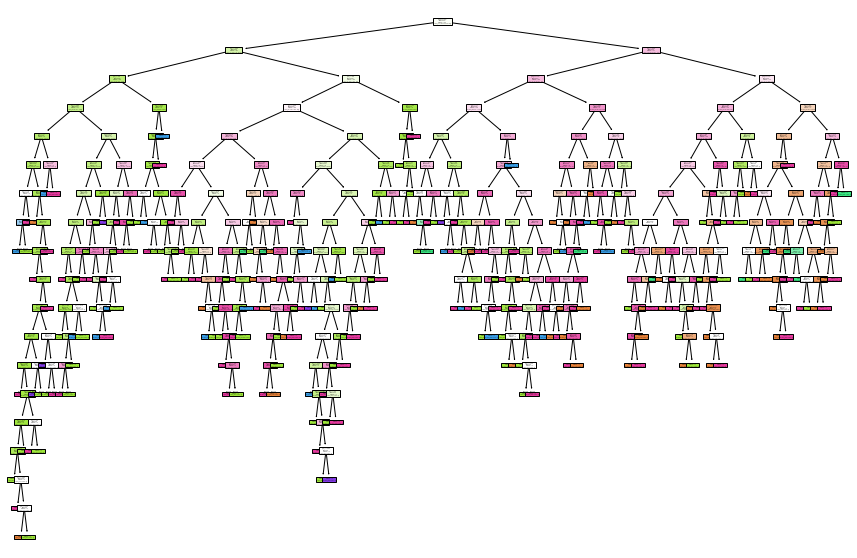

In [73]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)

In [74]:
y_pred=tree_model.predict(X_test)

In [75]:
y_pred

array(['OK', 'Verygood', 'Verygood', 'Good', 'Good', 'Excellent', 'Good',
       'Good', 'Good', 'Good', 'Excellent', 'Verygood', 'Verygood',
       'Verygood', 'Verygood', 'Good', 'Verygood', 'OK', 'Good',
       'Verygood', 'Excellent', 'Good', 'Poor', 'Verygood', 'Good',
       'Good', 'Excellent', 'Verygood', 'Verygood', 'Verygood', 'Good',
       'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Verygood',
       'Verygood', 'Verygood', 'Verygood', 'Verygood', 'Verygood', 'OK',
       'Good', 'Good', 'Good', 'Excellent', 'Good', 'Verygood',
       'Verygood', 'Good', 'Verygood', 'Excellent', 'Verygood',
       'Verygood', 'Good', 'Excellent', 'Excellent', 'Good', 'Good',
       'Verygood', 'Verygood', 'Excellent', 'Excellent', 'Verygood',
       'Nice', 'Verygood', 'Verygood', 'Good', 'Good', 'Verygood',
       'Verygood', 'Verygood', 'Verygood', 'Good', 'Good', 'Verygood',
       'Good', 'Good', 'Verygood', 'Verygood', 'Good', 'Poor', 'Good',
       'Verygood', 'Good', 'Veryg

In [76]:
from sklearn.metrics import accuracy_score,classification_report

In [77]:
score=accuracy_score(y_pred,y_test)
print(score)

0.5414847161572053


In [78]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   Excellent       0.50      0.48      0.49        27
        Good       0.59      0.63      0.61        90
        Nice       0.50      0.50      0.50         2
          OK       0.17      0.09      0.12        11
        Poor       0.00      0.00      0.00         4
    Verygood       0.53      0.55      0.54        95

    accuracy                           0.54       229
   macro avg       0.38      0.38      0.38       229
weighted avg       0.52      0.54      0.53       229



C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELLS\Dropbox\Desktop\Data\shuklaaaditconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif